## GUI and DATABASE

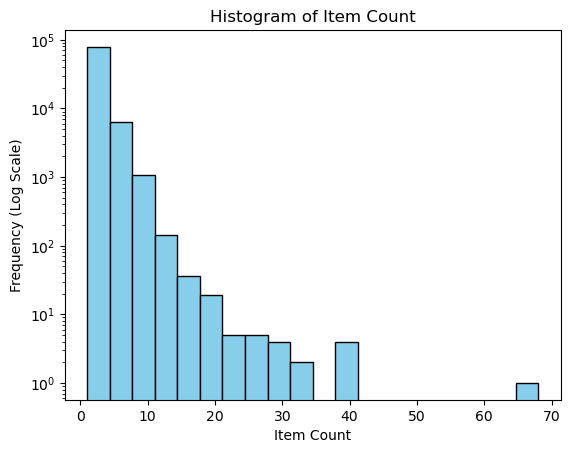

In [2]:
import tkinter as tk
from tkinter import ttk, messagebox
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

# Database setup
DB_NAME = "project_deliveroo_clone.db"

# Function to create the GUI window for adding new customers
def add_customer():
    def submit_customer():
        gender = gender_var.get()
        dob = dob_var.get()
        status = status_var.get()
        verified = verified_var.get()
        language = language_var.get()
        created_at = created_at_var.get()
        updated_at = updated_at_var.get()

        if not all([gender, dob, status, verified, language, created_at, updated_at]):
            messagebox.showerror("Error", "All fields must be filled!")
            return

        try:
            with sqlite3.connect(DB_NAME) as conn:
                cursor = conn.cursor()
                query = """
                INSERT INTO customers (gender, dob, status, verified, language, created_at, updated_at)
                VALUES (?, ?, ?, ?, ?, ?, ?)
                """
                cursor.execute(query, (gender, dob, status, verified, language, created_at, updated_at))
                conn.commit()
                messagebox.showinfo("Success", "Customer added successfully!")
                form.destroy()
        except Exception as e:
            messagebox.showerror("Database Error", str(e))

    
    # Create a new window for adding customers
    form = tk.Toplevel()
    form.title("Add New Customer")

    tk.Label(form, text="Gender:").grid(row=0, column=0, padx=5, pady=5)
    gender_var = tk.StringVar()
    tk.Entry(form, textvariable=gender_var).grid(row=0, column=1, padx=5, pady=5)

    tk.Label(form, text="Date of Birth:").grid(row=1, column=0, padx=5, pady=5)
    dob_var = tk.StringVar()
    tk.Entry(form, textvariable=dob_var).grid(row=1, column=1, padx=5, pady=5)

    tk.Label(form, text="Status:").grid(row=2, column=0, padx=5, pady=5)
    status_var = tk.StringVar()
    tk.Entry(form, textvariable=status_var).grid(row=2, column=1, padx=5, pady=5)

    tk.Label(form, text="Verified:").grid(row=3, column=0, padx=5, pady=5)
    verified_var = tk.StringVar()
    tk.Entry(form, textvariable=verified_var).grid(row=3, column=1, padx=5, pady=5)

    tk.Label(form, text="Language:").grid(row=4, column=0, padx=5, pady=5)
    language_var = tk.StringVar()
    tk.Entry(form, textvariable=language_var).grid(row=4, column=1, padx=5, pady=5)

    tk.Label(form, text="Created At:").grid(row=5, column=0, padx=5, pady=5)
    created_at_var = tk.StringVar()
    tk.Entry(form, textvariable=created_at_var).grid(row=5, column=1, padx=5, pady=5)

    tk.Label(form, text="Updated At:").grid(row=6, column=0, padx=5, pady=5)
    updated_at_var = tk.StringVar()
    tk.Entry(form, textvariable=updated_at_var).grid(row=6, column=1, padx=5, pady=5)

    tk.Button(form, text="Submit", command=submit_customer).grid(row=7, column=0, columnspan=2, pady=10)

# Function to print the mean, max, and min of grand_total
def print_grand_total_stats():
    with sqlite3.connect(DB_NAME) as conn:
        cursor = conn.cursor()
        query = "SELECT AVG(grand_total), MAX(grand_total), MIN(grand_total) FROM orders"
        cursor.execute(query)
        mean, max_val, min_val = cursor.fetchone()
        messagebox.showinfo(
            "Grand Total Stats",
            f"Mean: {mean:.2f}\nMax: {max_val:.2f}\nMin: {min_val:.2f}"
        )

# Function to plot the histogram of item_count
def plot_item_count_histogram():
    with sqlite3.connect(DB_NAME) as conn:
        cursor = conn.cursor()
        query = "SELECT item_count FROM orders"
        cursor.execute(query)
        item_counts = [row[0] for row in cursor.fetchall()]

    plt.hist(item_counts, bins=20, log=True, color='skyblue', edgecolor='black')
    plt.xlabel("Item Count")
    plt.ylabel("Frequency (Log Scale)")
    plt.title("Histogram of Item Count")
    plt.show()

# Function to print customer IDs with orders > 40 items
def print_large_orders():
    with sqlite3.connect(DB_NAME) as conn:
        cursor = conn.cursor()
        query = "SELECT customer_id FROM orders WHERE item_count > 40"
        cursor.execute(query)
        results = [row[0] for row in cursor.fetchall()]

    if results:
        result_str = "\n".join(map(str, results))
        messagebox.showinfo("Customers with Large Orders", f"Customer IDs:\n{result_str}")
    else:
        messagebox.showinfo("No Results", "No customers ordered more than 40 items.")

# Main dashboard GUI
def main_dashboard():
    root = tk.Tk()
    root.title("Customer Management Dashboard")

    # Add New Customer Button
    tk.Button(root, text="Add New Customer", command=add_customer, width=25).pack(pady=10)

    # Print Grand Total Stats Button
    tk.Button(root, text="Grand Total Stats", command=print_grand_total_stats, width=25).pack(pady=10)

    # Plot Item Count Histogram Button
    tk.Button(root, text="Item Count Histogram", command=plot_item_count_histogram, width=25).pack(pady=10)

    # Print Customer IDs with Large Orders Button
    tk.Button(root, text="Customers with Large Orders", command=print_large_orders, width=25).pack(pady=10)

    root.mainloop()

# Run the dashboard
if __name__ == "__main__":
    main_dashboard()
